In [8]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import requests
import cv2

# Image Filtering
* 이미지도 음성신호처럼 주파수로 표현이 가능
* 고주파 : 밝기의 변화가 많은 곳 (경계선)
* 저주파 : 일반적인 배경
* Low-pass filter(LPF) : 노이즈 제거, blur 처리 가능
* High-pass filter(HPF) : 경계선 찾기

(182, 276, 3)


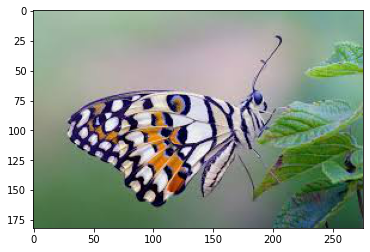

In [9]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTcQaCIU3conMbLLzRsyqQaQvjuMj7wIDRxuQ&usqp=CAU'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = np.asarray(img, dtype='uint8')
print(img.shape)
plt.imshow(img)

In [10]:
kernel = np.ones((5, 5), np.float32) / 25

print(kernel.shape)
print(kernel)

(5, 5)
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


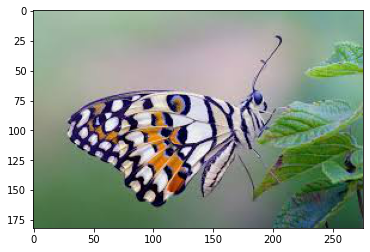

In [11]:
dst = cv2.filter2D(img, -1, kernel)
plt.imshow(img)

# Image Blurring
* low-pass filter를 이미지에 적용하기
* 고주파 영역 제거 → 노이즈 제거, 경계선 흐리기

### Averaging
* kernel을 적용한 뒤 평균값을 박스의 중심점에 적용

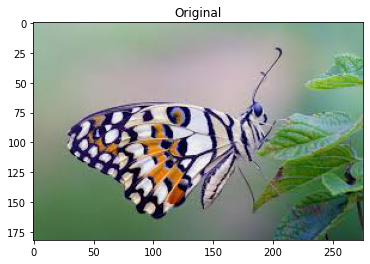

In [13]:
plt.title('Original')
plt.imshow(img)

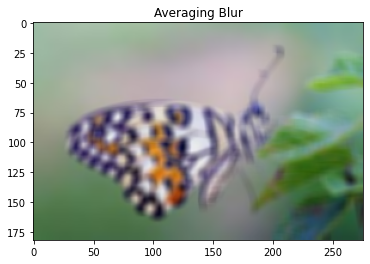

In [14]:
dst1 = cv2.blur(img, (7, 7))
plt.title('Averaging Blur')
plt.imshow(dst1)

### Gaussian Filtering
* Gaussian kernel을 적용

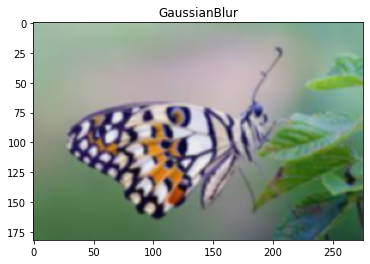

In [15]:
dst2 = cv2.GaussianBlur(img, (5, 5), 0)
plt.title('GaussianBlur')
plt.imshow(dst2)

### Median Filter
* salt and pepper noise 제거에 가장 효과적이다! (흰색과 검은색)

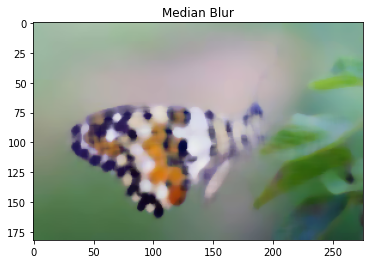

In [16]:
dst3 = cv2.medianBlur(img, 9)
plt.title('Median Blur')
plt.imshow(dst3)

### Bilateral Filtering
* 경계선은 유지를 하면서 blur를 처리해준다...?

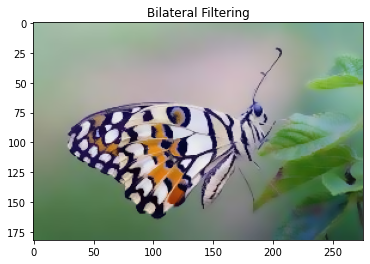

In [18]:
dst4 = cv2.bilateralFilter(img, 9, 75, 75)
plt.title('Bilateral Filtering')
plt.imshow(dst4)

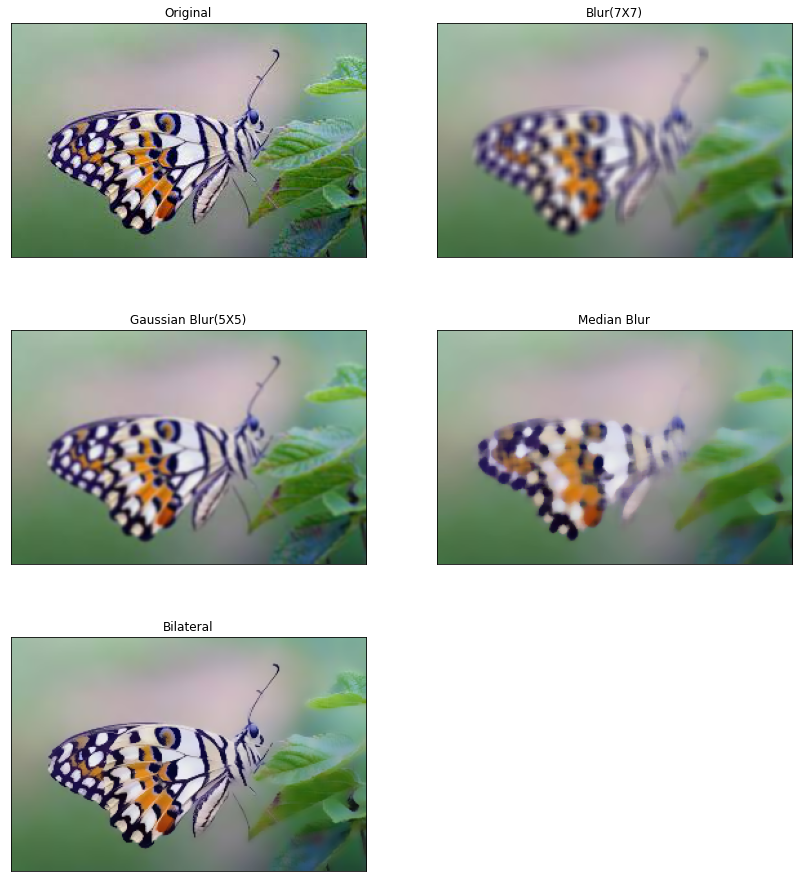

In [25]:
plt.figure(figsize=(14, 16))
images = [img, dst1, dst2, dst3, dst4]
titles = ['Original', 'Blur(7X7)', 'Gaussian Blur(5X5)', 'Median Blur', 'Bilateral']

for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()